In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


from catboost import Pool,CatBoostClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score, precision_score, f1_score

### vou usar isso com ref:https://www.kaggle.com/code/mehrankazeminia/ps3e17-gaussiannb

In [2]:
train = pd.read_csv("playground-series-s3e17/train.csv", )
test = pd.read_csv("playground-series-s3e17/test.csv")
df_original = pd.read_csv("original/machine failure.csv")
df_original.drop(columns='UDI', inplace= True)
train.drop(columns='id', inplace= True)
test.drop(columns = 'id', inplace = True)

In [3]:
train.head(5)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df_original.head(5)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df = pd.concat([train,df_original])

In [6]:
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [7]:
df.isnull().sum().sum()## 0 Null values

0

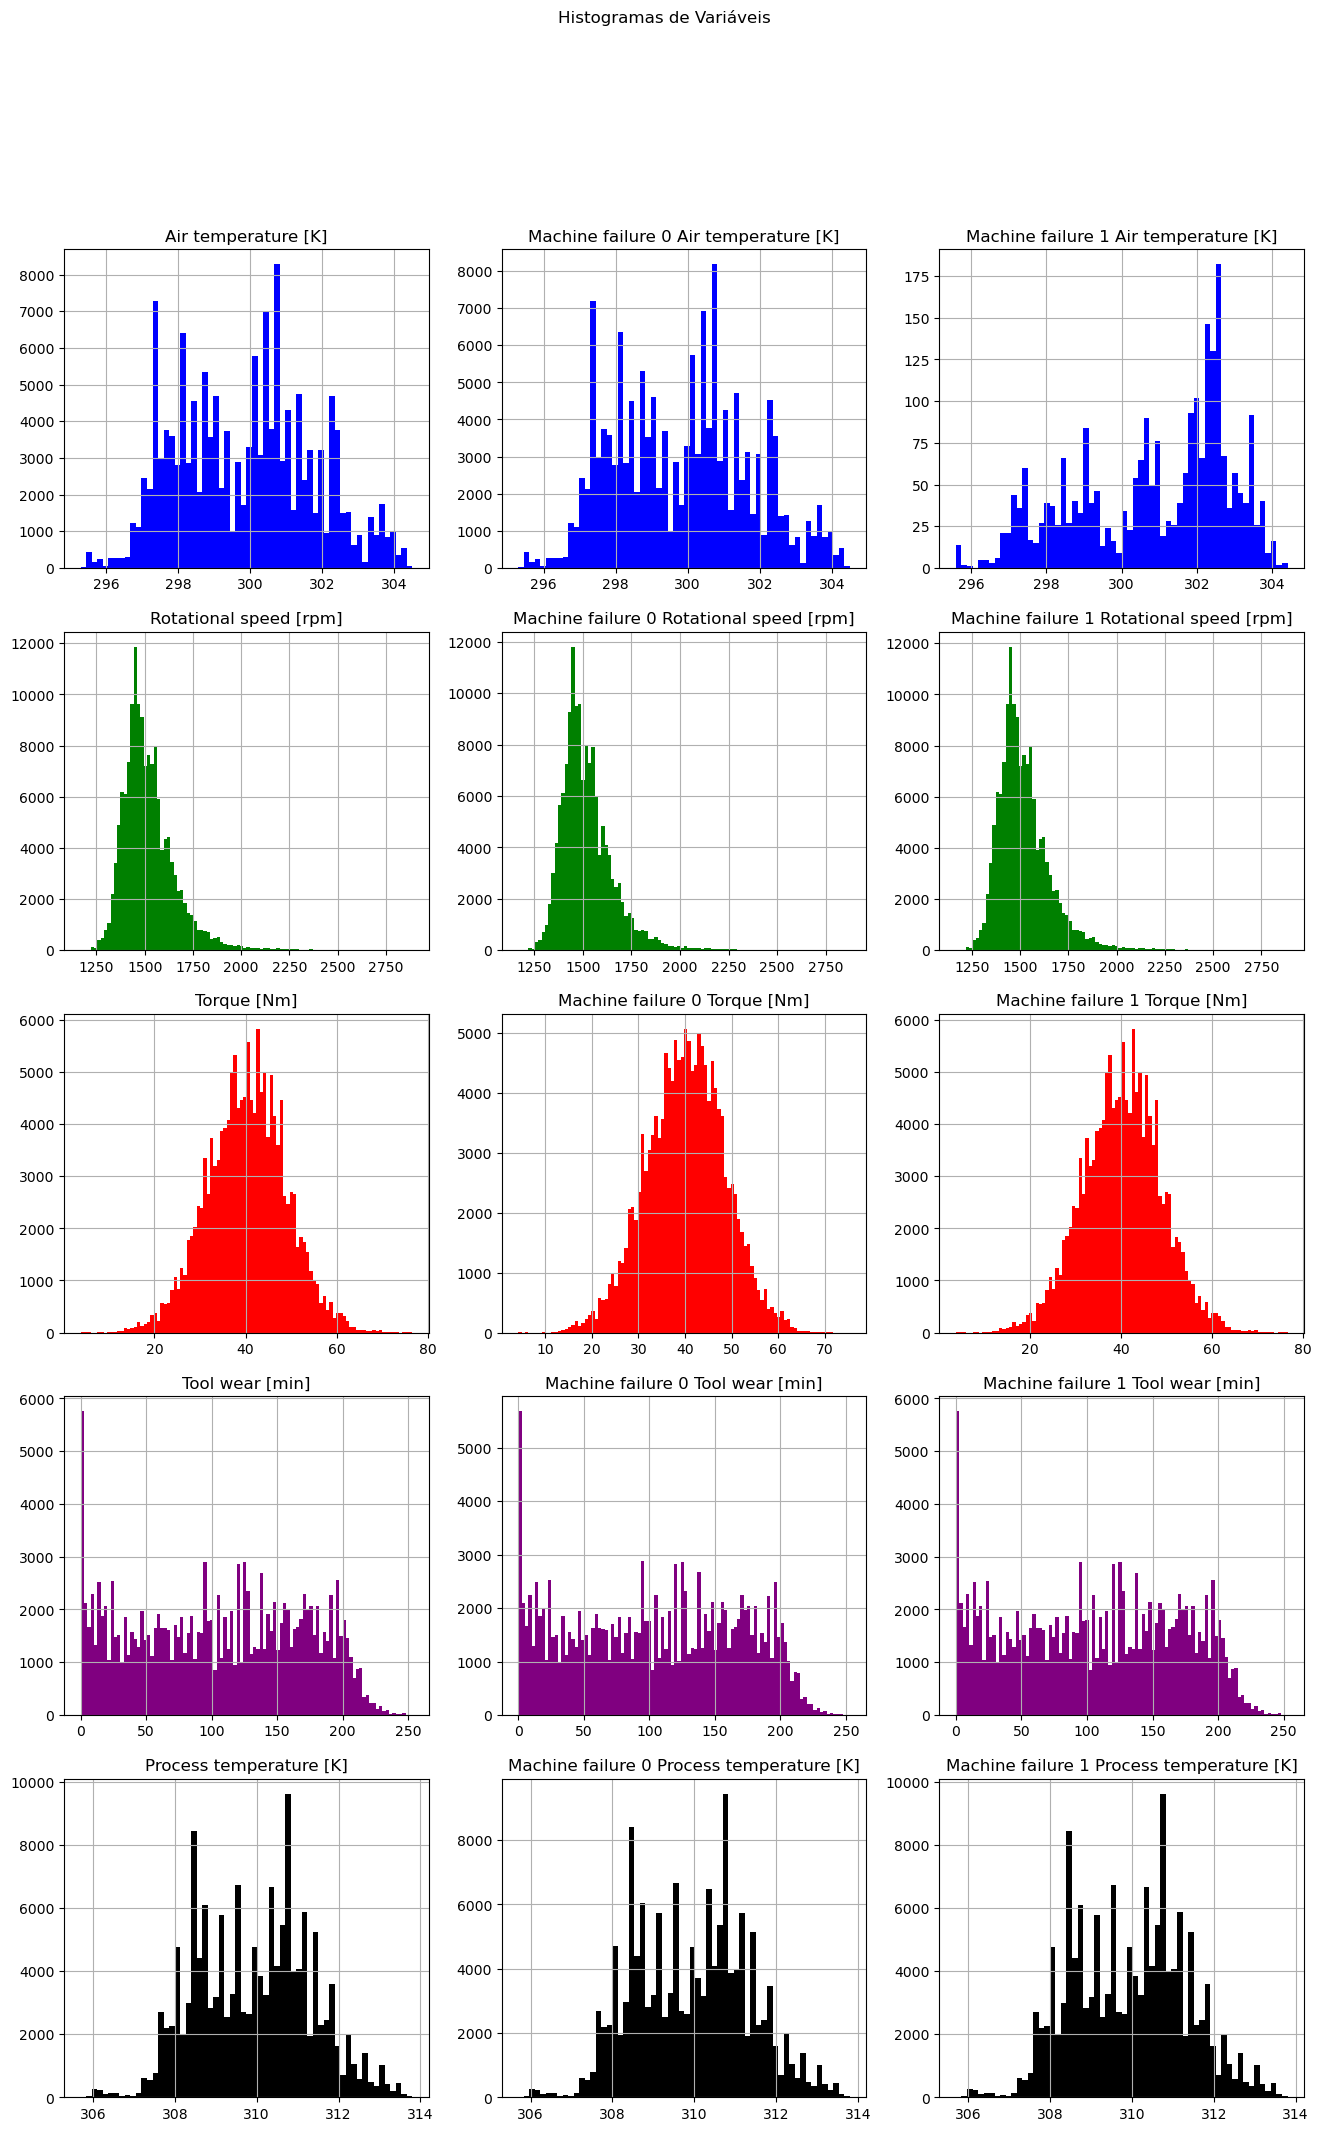

In [8]:
# Especifique as cores desejadas para cada coluna
colors = ['blue', 'green', 'red', 'purple', 'black']

# Crie subplots para cada coluna
fig, axs = plt.subplots(5, 3, figsize=(16, 24))
fig.suptitle('Histogramas de Variáveis')


axs[0, 0].hist(df['Air temperature [K]'], bins = 60,  color=colors[0])
axs[0, 0].set_title('Air temperature [K]')
axs[0, 0].grid()

axs[1, 0].hist(df['Rotational speed [rpm]'], bins = 100,  color=colors[1])
axs[1, 0].set_title('Rotational speed [rpm]')
axs[1, 0].grid()

axs[2, 0].hist(df['Torque [Nm]'], bins = 100,  color=colors[2])
axs[2, 0].set_title('Torque [Nm]')
axs[2, 0].grid()


axs[3, 0].hist(df['Tool wear [min]'], bins = 100,   color=colors[3])
axs[3, 0].set_title('Tool wear [min]')
axs[3, 0].grid()


axs[4, 0].hist(df['Process temperature [K]'], bins = 60,   color=colors[4])
axs[4, 0].set_title('Process temperature [K]')
axs[4, 0].grid()




df0 = df[df['Machine failure'] == 0]



axs[0, 1].hist(df0['Air temperature [K]'], bins = 60,  color=colors[0])
axs[0, 1].set_title('Machine failure 0 Air temperature [K]')
axs[0, 1].grid()

axs[1, 1].hist(df0['Rotational speed [rpm]'], bins = 100,  color=colors[1])
axs[1, 1].set_title('Machine failure 0 Rotational speed [rpm]')
axs[1, 1].grid()

axs[2, 1].hist(df0['Torque [Nm]'], bins = 100,  color=colors[2])
axs[2, 1].set_title('Machine failure 0 Torque [Nm]')
axs[2, 1].grid()


axs[3, 1].hist(df0['Tool wear [min]'], bins = 100,   color=colors[3])
axs[3, 1].set_title('Machine failure 0 Tool wear [min]')
axs[3, 1].grid()


axs[4, 1].hist(df0['Process temperature [K]'], bins = 60,   color=colors[4])
axs[4, 1].set_title('Machine failure 0 Process temperature [K]')
axs[4, 1].grid()


df1 = df[df['Machine failure'] == 1]


axs[0, 2].hist(df1['Air temperature [K]'], bins = 60,  color=colors[0])
axs[0, 2].set_title('Machine failure 1 Air temperature [K]')
axs[0, 2].grid()

axs[1, 2].hist(df['Rotational speed [rpm]'], bins = 100,  color=colors[1])
axs[1, 2].set_title('Machine failure 1 Rotational speed [rpm]')
axs[1, 2].grid()

axs[2, 2].hist(df['Torque [Nm]'], bins = 100,  color=colors[2])
axs[2, 2].set_title('Machine failure 1 Torque [Nm]')
axs[2, 2].grid()


axs[3, 2].hist(df['Tool wear [min]'], bins = 100,   color=colors[3])
axs[3, 2].set_title('Machine failure 1 Tool wear [min]')
axs[3, 2].grid()


axs[4, 2].hist(df['Process temperature [K]'], bins = 60,   color=colors[4])
axs[4, 2].set_title('Machine failure 1 Process temperature [K]')
axs[4, 2].grid()



plt.show()

In [9]:
df[df['Machine failure'] == 1]

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
130,L52498,L,303.9,312.8,1345,56.5,21,1,0,0,0,0,0
164,L51721,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0
228,M17895,M,300.7,309.7,1878,27.9,20,1,0,0,0,0,0
236,L55926,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0
247,L51801,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


Text(0.5, 1.0, 'Box Plot - Process temperature [K] x Machine failure')

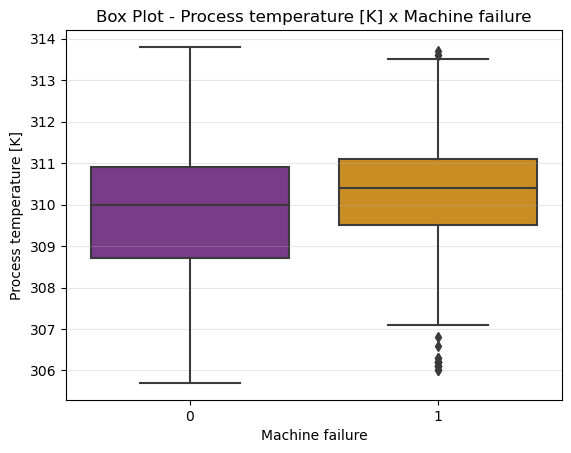

In [10]:
sns.boxplot(y = df['Process temperature [K]'], x = df['Machine failure'],palette="CMRmap")
plt.grid(alpha = 0.3, axis = 'y')
plt.title('Box Plot - Process temperature [K] x Machine failure')
##temperatura média mais alta onde ocorre machine failure

Text(0.5, 1.0, 'Box Plot - Air temperature [K] x Machine failure')

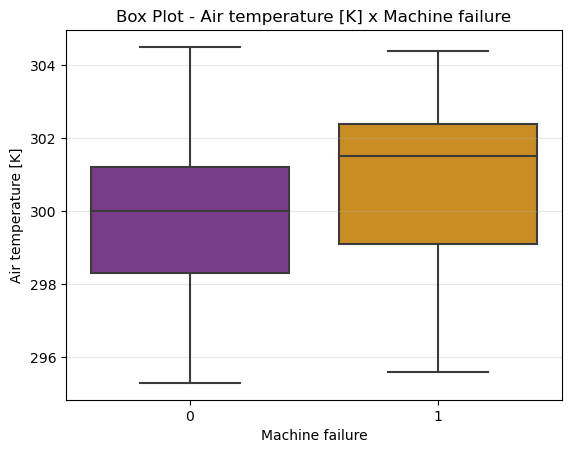

In [11]:
sns.boxplot(y = df['Air temperature [K]'], x = df['Machine failure'],palette="CMRmap")
plt.grid(alpha = 0.3, axis = 'y') ##temperatura média mais alta onde ocorre machine failure
plt.title('Box Plot - Air temperature [K] x Machine failure')

Text(0.5, 1.0, 'Box Plot - Rotational speed [rpm] x Machine failure')

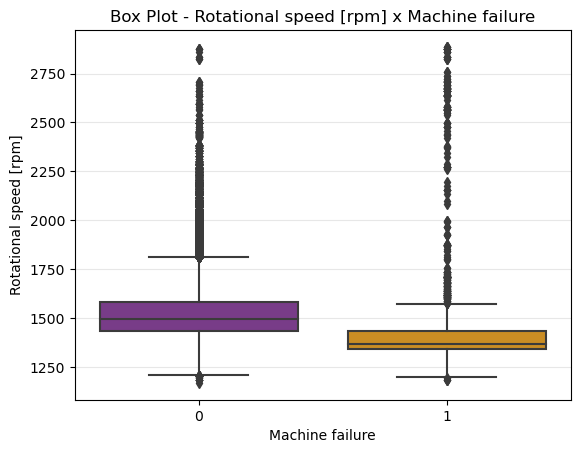

In [12]:
sns.boxplot(y = df['Rotational speed [rpm]'], x = df['Machine failure'],palette="CMRmap")
plt.grid(alpha = 0.3, axis = 'y') ##velocidade média mais baixa onde ocorre machine failure
plt.title('Box Plot - Rotational speed [rpm] x Machine failure')

Text(0.5, 1.0, 'Box Plot - Torque [Nm] x Machine failure')

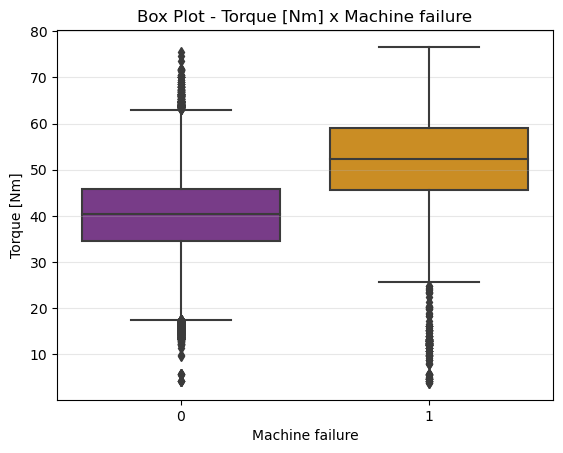

In [13]:
sns.boxplot(y = df['Torque [Nm]'], x = df['Machine failure'],palette="CMRmap")
plt.grid(alpha = 0.3, axis = 'y')##torque médio mais alto onde ocorre machine failure
plt.title('Box Plot - Torque [Nm] x Machine failure')

Text(0.5, 1.0, 'Box Plot - Tool wear [min] x Machine failure')

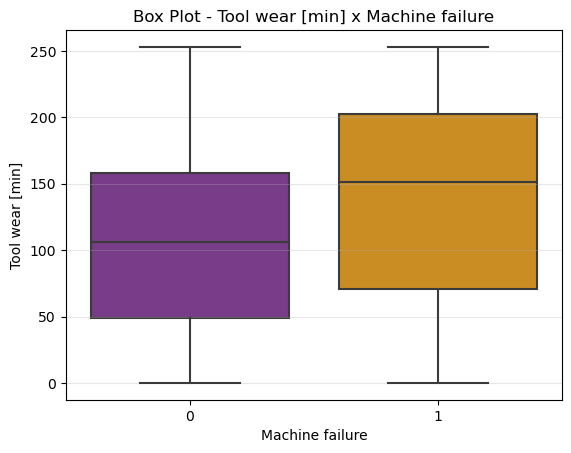

In [14]:
sns.boxplot(y = df['Tool wear [min]'], x = df['Machine failure'],palette="CMRmap")
plt.grid(alpha = 0.3, axis = 'y') ##Tool Wear mais alto onde ocorre machine failure
plt.title('Box Plot - Tool wear [min] x Machine failure')

In [15]:
df.groupby('TWF').describe()['Machine failure']['mean']###só acontece erro TWF = 1.

TWF
0    0.015249
1    1.000000
Name: mean, dtype: float64

In [16]:
df.groupby('HDF').describe()['Machine failure']['mean']###mais provavel erro HDF = 1

HDF
0    0.011496
1    0.992674
Name: mean, dtype: float64

In [17]:
df.groupby('PWF').describe()['Machine failure']['mean']###muito mais provavel erro PWF = 1

PWF
0    0.014164
1    0.992891
Name: mean, dtype: float64

In [18]:
df.groupby('OSF').describe()['Machine failure']['mean']###mais provavel erro OSF = 1

OSF
0    0.01271
1    0.99373
Name: mean, dtype: float64

In [19]:
df.groupby('RNF').describe()['Machine failure']['mean']###parece similar os valores

RNF
0    0.016974
1    0.021407
Name: mean, dtype: float64

Text(0.5, 1.0, 'Barplot - Machine Failure Ratio - TWF ')

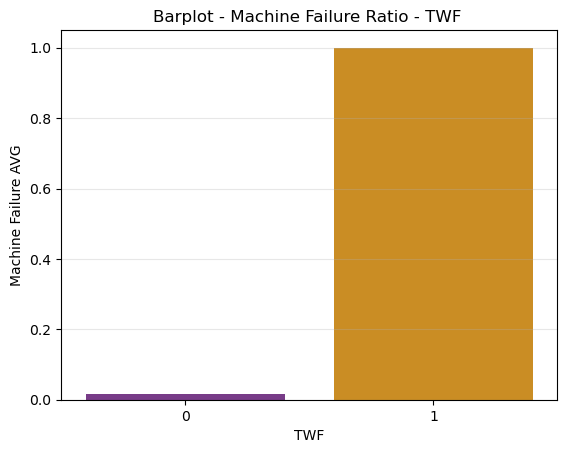

In [20]:
plotdf = df.groupby('TWF').describe()['Machine failure']['mean']
values = plotdf.values
index = plotdf.index

sns.barplot(x = index, y = values,palette="CMRmap")
plt.ylabel('Machine Failure AVG')
plt.grid(alpha = 0.3, axis = 'y') ###if twf = 1 so machine failure = 1
plt.title('Barplot - Machine Failure Ratio - TWF ')

Text(0.5, 1.0, 'Barplot - Machine Failure Ratio - HDF ')

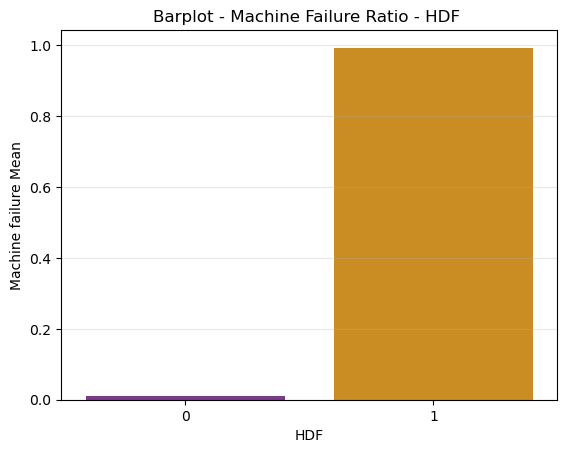

In [21]:
plotdf = df.groupby('HDF').describe()['Machine failure']['mean']
values = plotdf.values
index = plotdf.index

sns.barplot(x = index, y = values,palette="CMRmap")
plt.ylabel('Machine failure Mean')
plt.grid(alpha = 0.3, axis = 'y') ###if HDF = 1 so machine failure = 1 , high probability*
plt.title('Barplot - Machine Failure Ratio - HDF ')

Text(0.5, 1.0, 'Barplot - Machine Failure Ratio - PWF ')

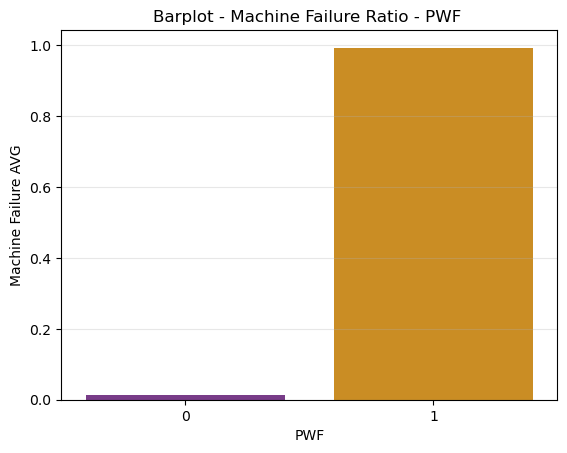

In [22]:
plotdf = df.groupby('PWF').describe()['Machine failure']['mean']
values = plotdf.values
index = plotdf.index

sns.barplot(x = index, y = values,palette="CMRmap")
plt.ylabel('Machine Failure AVG')
plt.grid(alpha = 0.3, axis = 'y') ###if PWF = 1 highly probability machine failure = 1,
plt.title('Barplot - Machine Failure Ratio - PWF ')

Text(0.5, 1.0, 'Barplot - Machine Failure Ratio - OSF ')

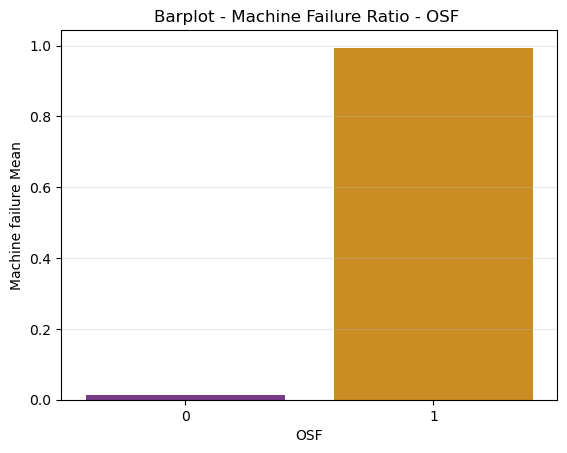

In [23]:
plotdf = df.groupby('OSF').describe()['Machine failure']['mean']
values = plotdf.values
index = plotdf.index

sns.barplot(x = index, y = values,palette="CMRmap")
plt.ylabel('Machine failure Mean')
plt.grid(alpha = 0.3, axis = 'y')

plt.title('Barplot - Machine Failure Ratio - OSF ')

Text(0.5, 1.0, 'Barplot - Machine Failure Ratio - RNF ')

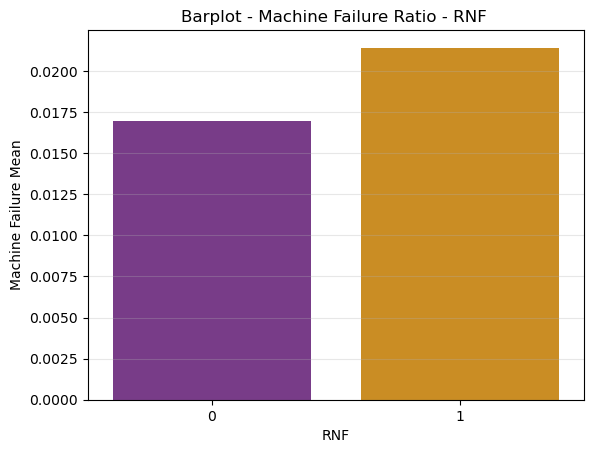

In [24]:
plotdf = df.groupby('RNF').describe()['Machine failure']['mean']
values = plotdf.values
index = plotdf.index

sns.barplot(x = index, y = values,palette="CMRmap")
plt.ylabel('Machine Failure Mean')
plt.grid(alpha = 0.3, axis = 'y')
plt.title('Barplot - Machine Failure Ratio - RNF ')

In [25]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [26]:
machinfailure1 = df[df['Machine failure'] == 1][['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure']]
a=machinfailure1

In [27]:
twfhdfpwfosf1 = a[(a['TWF'] == 1) | (a['HDF'] == 1) | (a['PWF'] == 1) | (a['OSF'] == 1)]

In [28]:
#len(machinfailure1), len(twfhdfpwfosf1), 
ratiotwfhdfpwfosf1erro = len(twfhdfpwfosf1)/len(machinfailure1)
ratiotwfhdfpwfosf1erro

0.792119018898271

Text(0.5, 1.0, 'Barplot - Machine Failure Ratio - TWF or HDF or PWF or OSF ')

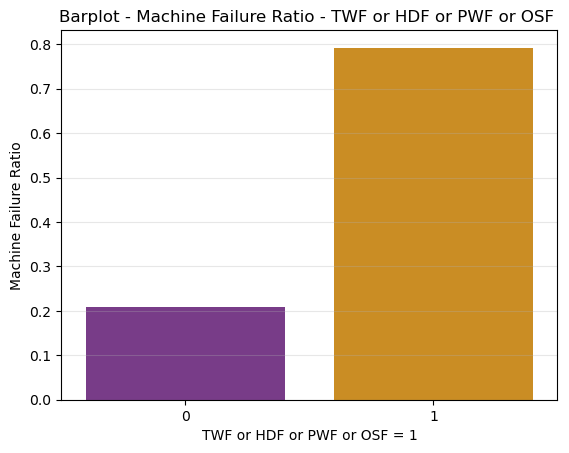

In [29]:

values = [ratiotwfhdfpwfosf1erro, 1-ratiotwfhdfpwfosf1erro]
index = [1, 0]

sns.barplot(x = index, y = values, palette="CMRmap")
plt.xlabel('TWF or HDF or PWF or OSF = 1')
plt.ylabel('Machine Failure Ratio')
plt.grid(alpha = 0.3, axis = 'y')
plt.title('Barplot - Machine Failure Ratio - TWF or HDF or PWF or OSF ')

In [30]:
values = df.groupby('Type').describe()['Machine failure']['mean']
print(f' machine failure{100*values}') ###chance de machine failure


 machine failureType
H    1.380214
L    1.805553
M    1.479416
Name: mean, dtype: float64


Text(0.5, 1.0, 'Barplot - Machine Failure Ratio - Type')

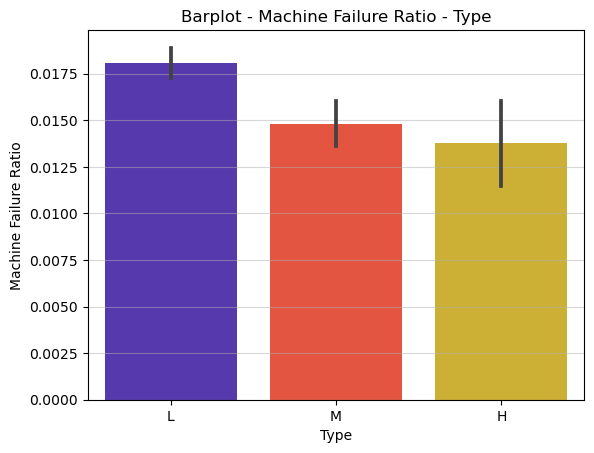

In [31]:
sns.barplot(y = df['Machine failure'] , x = df['Type'], palette= 'CMRmap')
plt.grid(alpha = 0.5, axis = 'y') ### Maquinas L maior chance de quebra Maquinas H menor
plt.ylabel('Machine Failure Ratio')
plt.title('Barplot - Machine Failure Ratio - Type')

In [32]:
dfgroupbymf = df.groupby(by = 'Machine failure').describe()

In [33]:
columnsaux = df.drop(columns=['Product ID', 'Machine failure', 'Type', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF']).columns ##colunas que irei usar para achar a media dos valores 

In [34]:
for n in columnsaux:
    print(f"Machine Failure \t \t 0 \t \t 1 \n {n} Médio {dfgroupbymf[n]['mean'].values}")


Machine Failure 	 	 0 	 	 1 
 Air temperature [K] Médio [299.85535587 300.86381182]
Machine Failure 	 	 0 	 	 1 
 Process temperature [K] Médio [309.93966737 310.28158424]
Machine Failure 	 	 0 	 	 1 
 Rotational speed [rpm] Médio [1522.6650387 1459.4141536]
Machine Failure 	 	 0 	 	 1 
 Torque [Nm] Médio [40.15413312 50.15195014]
Machine Failure 	 	 0 	 	 1 
 Tool wear [min] Médio [104.13623543 134.43264978]


### Conclusão
* se TWF ou HDF ou PWF ou OSF forem 1 quase certo a chance de ocorrer erro.
79% das machine failure tem algum deles igual 1
* pode ocorrer erro se todos forem 0  ocorre em 21% dos casos
* RNF não parece ter tanta influência comparado aos outros , porém é mais provavel quando é 1
* Temperatura média mais alta onde ocorre machine failure 
* Velocidade média mais baixa onde ocorre machine failure
* Torque médio mais alto onde ocorre machine failure
* Tool Wear mais alto onde ocorre machine failure

* tipos maquinas chance de quebra maquinas L tem chance de quebra com 1.8% de chance, M 1.47%, H 1.38% chance

In [35]:
## Machine Learning

In [36]:
df['Product ID'].value_counts()

L53257    140
L53271    132
L49056    132
L48892    121
L54275    121
         ... 
H31308      1
L48159      1
M15753      1
M14860      1
M24818      1
Name: Product ID, Length: 10000, dtype: int64

In [37]:
len(df['Product ID'].value_counts())

10000

In [38]:
machinfailure1 = df[df['Machine failure'] == 1]
dferro = machinfailure1['Product ID'].value_counts() ##ID das maquinas que ocorreram erro
values = machinfailure1['Product ID'].values 
dftotal = df[df['Product ID'].isin(values)]['Product ID'].value_counts() ###criar um dataframe apenas com as que tem o
#ID das maquinas com erros

In [39]:
dftotal = dftotal.to_frame()

In [40]:
dferro = dferro.to_frame()

In [41]:
dftotalerro = pd.merge(dftotal, dferro, left_index=True, right_index=True)

In [42]:
dftotalerro['ratio'] = dftotalerro['Product ID_y']/dftotalerro['Product ID_x']

In [43]:
dftotalerro10pls = dftotalerro[dftotalerro['Product ID_x'] > 9] ###+de 10 ou = valores erro

In [44]:
dftotalerro10pls

,Product ID_x,Product ID_y,ratio
L53257,140,4,0.028571
L53271,132,6,0.045455
L54275,121,2,0.016529
L53258,118,20,0.169492
L54255,109,1,0.009174
...,...,...,...
L51759,10,4,0.400000
L51790,10,1,0.100000
L51054,10,1,0.100000
L55372,10,1,0.100000


In [45]:
dftotalerro10plsratio01 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.1] 
###valores com chance de erro >= ou 0.1 alta chance de erro e com + de 10 valores

In [46]:
dftotalerro10plsratio01['Product ID_y'].sum() ###mais da metade dos erro

1211

In [47]:
print(f" maquinas com 10% ou mais chance de problemas causam {100*round(dftotalerro10plsratio01['Product ID_y'].sum()/df['Machine failure'].sum(),3)}% dos casos")


 maquinas com 10% ou mais chance de problemas causam 48.699999999999996% dos casos


### Novas Colunas 

In [48]:
###criar uma coluna com os esses separando essas maquinas com problemas mais frequentes

dftotalerro10plsratio01 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.1] 
df['totalerro10plsratio01'] = df['Product ID'].isin(dftotalerro10plsratio01.index).astype(int) #10%
test['totalerro10plsratio01'] = test['Product ID'].isin(dftotalerro10plsratio01.index).astype(int) #10%


dftotalerro10plsratio02 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.2] 
df['totalerro10plsratio02'] = df['Product ID'].isin(dftotalerro10plsratio02.index).astype(int) #20%
test['totalerro10plsratio02'] = test['Product ID'].isin(dftotalerro10plsratio02.index).astype(int) #20%

dftotalerro10plsratio03 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.3] 
df['totalerro10plsratio03'] = df['Product ID'].isin(dftotalerro10plsratio03.index).astype(int) #30
test['totalerro10plsratio03'] = test['Product ID'].isin(dftotalerro10plsratio03.index).astype(int) #30

dftotalerro10plsratio04 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.4] 
df['totalerro10plsratio04'] = df['Product ID'].isin(dftotalerro10plsratio04.index).astype(int) #40
test['totalerro10plsratio04'] = test['Product ID'].isin(dftotalerro10plsratio04.index).astype(int) #40

dftotalerro10plsratio05 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.5] 
df['totalerro10plsratio05'] = df['Product ID'].isin(dftotalerro10plsratio05.index).astype(int) #50
test['totalerro10plsratio05'] = test['Product ID'].isin(dftotalerro10plsratio05.index).astype(int) #50

dftotalerro10plsratio06 = dftotalerro10pls[dftotalerro10pls['ratio'] >= 0.6] 
df['totalerro10plsratio06'] = df['Product ID'].isin(dftotalerro10plsratio06.index).astype(int) #60
test['totalerro10plsratio06'] = test['Product ID'].isin(dftotalerro10plsratio06.index).astype(int) #60
##não tem acima de 0.7

Typemap = {'L' : 0 , 'M' : 1, 'H' : 2}
df['Type'] = df['Type'].map(Typemap)
test['Type'] = test['Type'].map(Typemap)

In [49]:
matrix = df.corr()
abs(matrix['Machine failure'].sort_values(ascending = False))

C:\Users\vitor\AppData\Local\Temp\ipykernel_13984\3849833344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


Machine failure            1.000000
HDF                        0.566309
OSF                        0.500060
PWF                        0.406044
TWF                        0.319621
totalerro10plsratio01      0.301261
totalerro10plsratio02      0.290215
totalerro10plsratio03      0.247147
totalerro10plsratio04      0.195357
totalerro10plsratio05      0.156436
Torque [Nm]                0.150027
totalerro10plsratio06      0.112434
Air temperature [K]        0.069595
Tool wear [min]            0.061215
Process temperature [K]    0.031734
RNF                        0.001619
Type                       0.012176
Rotational speed [rpm]     0.057575
Name: Machine failure, dtype: float64

In [50]:
df

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,totalerro10plsratio01,totalerro10plsratio02,totalerro10plsratio03,totalerro10plsratio04,totalerro10plsratio05,totalerro10plsratio06
0,L50096,0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,0,0,0,0,0
1,M20343,1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,0,0,0,0
2,L49454,0,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,0,0,0,0,0
3,L53355,0,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,0,0,0,0,0
4,M24050,1,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M24855,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0,0,0,0,0,0
9996,H39410,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,0,0,0,0,0,0
9997,M24857,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0,0,0,0,0,0
9998,H39412,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,0,0,0,0,0,0


### Catboost

In [51]:
## Teste para saber quão bom é o modelo. 

In [52]:
X = df.drop(columns=['Machine failure'])
y = df['Machine failure']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


feature_names = list(X.columns)

model = CatBoostClassifier()


train_pool = Pool(X_train.to_numpy(), y_train.to_numpy(), 
                  feature_names=feature_names, cat_features=['Product ID', 'Type'])


model.fit(train_pool, eval_set=train_pool, verbose=True)

Learning rate set to 0.098369
0:	learn: 0.4616536	test: 0.4616491	best: 0.4616491 (0)	total: 217ms	remaining: 3m 36s
1:	learn: 0.3175828	test: 0.3175757	best: 0.3175757 (1)	total: 278ms	remaining: 2m 18s
2:	learn: 0.2102924	test: 0.2102873	best: 0.2102873 (2)	total: 335ms	remaining: 1m 51s
3:	learn: 0.1518647	test: 0.1518609	best: 0.1518609 (3)	total: 380ms	remaining: 1m 34s
4:	learn: 0.1090603	test: 0.1090575	best: 0.1090575 (4)	total: 445ms	remaining: 1m 28s
5:	learn: 0.0794032	test: 0.0794013	best: 0.0794013 (5)	total: 498ms	remaining: 1m 22s
6:	learn: 0.0601516	test: 0.0601502	best: 0.0601502 (6)	total: 554ms	remaining: 1m 18s
7:	learn: 0.0472751	test: 0.0472741	best: 0.0472741 (7)	total: 614ms	remaining: 1m 16s
8:	learn: 0.0397682	test: 0.0397674	best: 0.0397674 (8)	total: 673ms	remaining: 1m 14s
9:	learn: 0.0346055	test: 0.0346027	best: 0.0346027 (9)	total: 731ms	remaining: 1m 12s
10:	learn: 0.0307290	test: 0.0307262	best: 0.0307262 (10)	total: 792ms	remaining: 1m 11s
11:	learn: 

97:	learn: 0.0137856	test: 0.0139963	best: 0.0139963 (97)	total: 5.6s	remaining: 51.6s
98:	learn: 0.0137677	test: 0.0139705	best: 0.0139705 (98)	total: 5.66s	remaining: 51.5s
99:	learn: 0.0137649	test: 0.0139675	best: 0.0139675 (99)	total: 5.7s	remaining: 51.3s
100:	learn: 0.0137641	test: 0.0139666	best: 0.0139666 (100)	total: 5.72s	remaining: 51s
101:	learn: 0.0137596	test: 0.0139651	best: 0.0139651 (101)	total: 5.78s	remaining: 50.9s
102:	learn: 0.0137577	test: 0.0139631	best: 0.0139631 (102)	total: 5.84s	remaining: 50.8s
103:	learn: 0.0137568	test: 0.0139632	best: 0.0139631 (102)	total: 5.87s	remaining: 50.6s
104:	learn: 0.0137484	test: 0.0139643	best: 0.0139631 (102)	total: 5.92s	remaining: 50.5s
105:	learn: 0.0137262	test: 0.0139416	best: 0.0139416 (105)	total: 5.97s	remaining: 50.4s
106:	learn: 0.0137211	test: 0.0139363	best: 0.0139363 (106)	total: 6.03s	remaining: 50.3s
107:	learn: 0.0137056	test: 0.0139268	best: 0.0139268 (107)	total: 6.08s	remaining: 50.2s
108:	learn: 0.013683

189:	learn: 0.0123079	test: 0.0129137	best: 0.0129137 (189)	total: 10.5s	remaining: 44.7s
190:	learn: 0.0123062	test: 0.0129181	best: 0.0129137 (189)	total: 10.5s	remaining: 44.7s
191:	learn: 0.0122880	test: 0.0128626	best: 0.0128626 (191)	total: 10.6s	remaining: 44.6s
192:	learn: 0.0122831	test: 0.0128574	best: 0.0128574 (192)	total: 10.7s	remaining: 44.5s
193:	learn: 0.0122618	test: 0.0128348	best: 0.0128348 (193)	total: 10.7s	remaining: 44.5s
194:	learn: 0.0122521	test: 0.0128301	best: 0.0128301 (194)	total: 10.8s	remaining: 44.5s
195:	learn: 0.0122243	test: 0.0128015	best: 0.0128015 (195)	total: 10.8s	remaining: 44.5s
196:	learn: 0.0122097	test: 0.0127897	best: 0.0127897 (196)	total: 10.9s	remaining: 44.4s
197:	learn: 0.0122043	test: 0.0127843	best: 0.0127843 (197)	total: 10.9s	remaining: 44.3s
198:	learn: 0.0121993	test: 0.0127812	best: 0.0127812 (198)	total: 11s	remaining: 44.2s
199:	learn: 0.0121805	test: 0.0127710	best: 0.0127710 (199)	total: 11s	remaining: 44.2s
200:	learn: 0.

283:	learn: 0.0112939	test: 0.0121581	best: 0.0121517 (277)	total: 15.4s	remaining: 38.9s
284:	learn: 0.0112887	test: 0.0121596	best: 0.0121517 (277)	total: 15.5s	remaining: 38.9s
285:	learn: 0.0112840	test: 0.0121587	best: 0.0121517 (277)	total: 15.6s	remaining: 38.8s
286:	learn: 0.0112767	test: 0.0121531	best: 0.0121517 (277)	total: 15.6s	remaining: 38.7s
287:	learn: 0.0112617	test: 0.0121454	best: 0.0121454 (287)	total: 15.6s	remaining: 38.7s
288:	learn: 0.0112560	test: 0.0121404	best: 0.0121404 (288)	total: 15.7s	remaining: 38.6s
289:	learn: 0.0112500	test: 0.0121357	best: 0.0121357 (289)	total: 15.8s	remaining: 38.6s
290:	learn: 0.0112450	test: 0.0121277	best: 0.0121277 (290)	total: 15.8s	remaining: 38.5s
291:	learn: 0.0112421	test: 0.0121262	best: 0.0121262 (291)	total: 15.8s	remaining: 38.4s
292:	learn: 0.0112169	test: 0.0121083	best: 0.0121083 (292)	total: 15.9s	remaining: 38.4s
293:	learn: 0.0112117	test: 0.0121075	best: 0.0121075 (293)	total: 16s	remaining: 38.3s
294:	learn: 

377:	learn: 0.0105052	test: 0.0116180	best: 0.0116180 (377)	total: 20.7s	remaining: 34s
378:	learn: 0.0104990	test: 0.0116178	best: 0.0116178 (378)	total: 20.7s	remaining: 34s
379:	learn: 0.0104934	test: 0.0116132	best: 0.0116132 (379)	total: 20.8s	remaining: 33.9s
380:	learn: 0.0104932	test: 0.0116134	best: 0.0116132 (379)	total: 20.8s	remaining: 33.8s
381:	learn: 0.0104917	test: 0.0116120	best: 0.0116120 (381)	total: 20.9s	remaining: 33.8s
382:	learn: 0.0104762	test: 0.0116080	best: 0.0116080 (382)	total: 20.9s	remaining: 33.7s
383:	learn: 0.0104661	test: 0.0116015	best: 0.0116015 (383)	total: 21s	remaining: 33.7s
384:	learn: 0.0104637	test: 0.0116047	best: 0.0116015 (383)	total: 21s	remaining: 33.6s
385:	learn: 0.0104581	test: 0.0116046	best: 0.0116015 (383)	total: 21.1s	remaining: 33.5s
386:	learn: 0.0104328	test: 0.0115767	best: 0.0115767 (386)	total: 21.2s	remaining: 33.5s
387:	learn: 0.0104214	test: 0.0115639	best: 0.0115639 (387)	total: 21.2s	remaining: 33.4s
388:	learn: 0.0104

473:	learn: 0.0097505	test: 0.0111793	best: 0.0111657 (469)	total: 25.8s	remaining: 28.7s
474:	learn: 0.0097360	test: 0.0111636	best: 0.0111636 (474)	total: 25.9s	remaining: 28.6s
475:	learn: 0.0097204	test: 0.0111483	best: 0.0111483 (475)	total: 25.9s	remaining: 28.6s
476:	learn: 0.0097199	test: 0.0111496	best: 0.0111483 (475)	total: 26s	remaining: 28.5s
477:	learn: 0.0097128	test: 0.0111447	best: 0.0111447 (477)	total: 26s	remaining: 28.4s
478:	learn: 0.0097054	test: 0.0111399	best: 0.0111399 (478)	total: 26.1s	remaining: 28.4s
479:	learn: 0.0097009	test: 0.0111483	best: 0.0111399 (478)	total: 26.1s	remaining: 28.3s
480:	learn: 0.0096943	test: 0.0111443	best: 0.0111399 (478)	total: 26.2s	remaining: 28.2s
481:	learn: 0.0096911	test: 0.0111483	best: 0.0111399 (478)	total: 26.2s	remaining: 28.2s
482:	learn: 0.0096855	test: 0.0111456	best: 0.0111399 (478)	total: 26.3s	remaining: 28.1s
483:	learn: 0.0096782	test: 0.0111387	best: 0.0111387 (483)	total: 26.3s	remaining: 28.1s
484:	learn: 0.

568:	learn: 0.0091249	test: 0.0107963	best: 0.0107926 (565)	total: 30.8s	remaining: 23.3s
569:	learn: 0.0091205	test: 0.0107974	best: 0.0107926 (565)	total: 30.8s	remaining: 23.3s
570:	learn: 0.0091198	test: 0.0107965	best: 0.0107926 (565)	total: 30.9s	remaining: 23.2s
571:	learn: 0.0091110	test: 0.0108005	best: 0.0107926 (565)	total: 30.9s	remaining: 23.1s
572:	learn: 0.0091063	test: 0.0107994	best: 0.0107926 (565)	total: 31s	remaining: 23.1s
573:	learn: 0.0091052	test: 0.0107977	best: 0.0107926 (565)	total: 31s	remaining: 23s
574:	learn: 0.0091024	test: 0.0108010	best: 0.0107926 (565)	total: 31.1s	remaining: 23s
575:	learn: 0.0091015	test: 0.0108001	best: 0.0107926 (565)	total: 31.1s	remaining: 22.9s
576:	learn: 0.0090999	test: 0.0107983	best: 0.0107926 (565)	total: 31.2s	remaining: 22.9s
577:	learn: 0.0090996	test: 0.0107982	best: 0.0107926 (565)	total: 31.2s	remaining: 22.8s
578:	learn: 0.0090969	test: 0.0107965	best: 0.0107926 (565)	total: 31.3s	remaining: 22.7s
579:	learn: 0.0090

663:	learn: 0.0086730	test: 0.0105892	best: 0.0105892 (663)	total: 35.9s	remaining: 18.2s
664:	learn: 0.0086668	test: 0.0105879	best: 0.0105879 (664)	total: 36s	remaining: 18.1s
665:	learn: 0.0086633	test: 0.0105861	best: 0.0105861 (665)	total: 36s	remaining: 18.1s
666:	learn: 0.0086570	test: 0.0105813	best: 0.0105813 (666)	total: 36.1s	remaining: 18s
667:	learn: 0.0086529	test: 0.0105831	best: 0.0105813 (666)	total: 36.1s	remaining: 17.9s
668:	learn: 0.0086486	test: 0.0105796	best: 0.0105796 (668)	total: 36.2s	remaining: 17.9s
669:	learn: 0.0086480	test: 0.0105794	best: 0.0105794 (669)	total: 36.2s	remaining: 17.8s
670:	learn: 0.0086405	test: 0.0105701	best: 0.0105701 (670)	total: 36.3s	remaining: 17.8s
671:	learn: 0.0086362	test: 0.0105751	best: 0.0105701 (670)	total: 36.3s	remaining: 17.7s
672:	learn: 0.0086340	test: 0.0105723	best: 0.0105701 (670)	total: 36.4s	remaining: 17.7s
673:	learn: 0.0086283	test: 0.0105668	best: 0.0105668 (673)	total: 36.4s	remaining: 17.6s
674:	learn: 0.00

756:	learn: 0.0081977	test: 0.0103204	best: 0.0103204 (756)	total: 40.8s	remaining: 13.1s
757:	learn: 0.0081968	test: 0.0103228	best: 0.0103204 (756)	total: 40.8s	remaining: 13s
758:	learn: 0.0081927	test: 0.0103214	best: 0.0103204 (756)	total: 40.9s	remaining: 13s
759:	learn: 0.0081816	test: 0.0103104	best: 0.0103104 (759)	total: 40.9s	remaining: 12.9s
760:	learn: 0.0081806	test: 0.0103088	best: 0.0103088 (760)	total: 41s	remaining: 12.9s
761:	learn: 0.0081742	test: 0.0103022	best: 0.0103022 (761)	total: 41s	remaining: 12.8s
762:	learn: 0.0081739	test: 0.0103016	best: 0.0103016 (762)	total: 41.1s	remaining: 12.8s
763:	learn: 0.0081690	test: 0.0103010	best: 0.0103010 (763)	total: 41.1s	remaining: 12.7s
764:	learn: 0.0081594	test: 0.0102946	best: 0.0102946 (764)	total: 41.2s	remaining: 12.7s
765:	learn: 0.0081571	test: 0.0102914	best: 0.0102914 (765)	total: 41.2s	remaining: 12.6s
766:	learn: 0.0081444	test: 0.0102835	best: 0.0102835 (766)	total: 41.3s	remaining: 12.5s
767:	learn: 0.0081

850:	learn: 0.0077629	test: 0.0100602	best: 0.0100602 (850)	total: 45.9s	remaining: 8.04s
851:	learn: 0.0077609	test: 0.0100604	best: 0.0100602 (850)	total: 46s	remaining: 7.99s
852:	learn: 0.0077592	test: 0.0100578	best: 0.0100578 (852)	total: 46s	remaining: 7.93s
853:	learn: 0.0077581	test: 0.0100527	best: 0.0100527 (853)	total: 46.1s	remaining: 7.88s
854:	learn: 0.0077574	test: 0.0100526	best: 0.0100526 (854)	total: 46.2s	remaining: 7.83s
855:	learn: 0.0077447	test: 0.0100380	best: 0.0100380 (855)	total: 46.2s	remaining: 7.77s
856:	learn: 0.0077432	test: 0.0100356	best: 0.0100356 (856)	total: 46.3s	remaining: 7.72s
857:	learn: 0.0077378	test: 0.0100316	best: 0.0100316 (857)	total: 46.3s	remaining: 7.67s
858:	learn: 0.0077368	test: 0.0100304	best: 0.0100304 (858)	total: 46.4s	remaining: 7.61s
859:	learn: 0.0077255	test: 0.0100479	best: 0.0100304 (858)	total: 46.4s	remaining: 7.56s
860:	learn: 0.0077251	test: 0.0100486	best: 0.0100304 (858)	total: 46.5s	remaining: 7.5s
861:	learn: 0.0

943:	learn: 0.0073479	test: 0.0098561	best: 0.0098561 (943)	total: 51.5s	remaining: 3.05s
944:	learn: 0.0073447	test: 0.0098576	best: 0.0098561 (943)	total: 51.5s	remaining: 3s
945:	learn: 0.0073422	test: 0.0098535	best: 0.0098535 (945)	total: 51.6s	remaining: 2.94s
946:	learn: 0.0073357	test: 0.0098481	best: 0.0098481 (946)	total: 51.6s	remaining: 2.89s
947:	learn: 0.0073294	test: 0.0098440	best: 0.0098440 (947)	total: 51.7s	remaining: 2.83s
948:	learn: 0.0073285	test: 0.0098437	best: 0.0098437 (948)	total: 51.7s	remaining: 2.78s
949:	learn: 0.0073244	test: 0.0098385	best: 0.0098385 (949)	total: 51.8s	remaining: 2.73s
950:	learn: 0.0073210	test: 0.0098326	best: 0.0098326 (950)	total: 51.8s	remaining: 2.67s
951:	learn: 0.0073116	test: 0.0098232	best: 0.0098232 (951)	total: 51.9s	remaining: 2.62s
952:	learn: 0.0073088	test: 0.0098214	best: 0.0098214 (952)	total: 52s	remaining: 2.56s
953:	learn: 0.0073039	test: 0.0098200	best: 0.0098200 (953)	total: 52s	remaining: 2.51s
954:	learn: 0.007

In [54]:
test_pool = Pool(X_test.to_numpy(), 
                 feature_names=feature_names, 
                 cat_features=['Product ID', 'Type'])
pred = model.predict_proba(test_pool)[:, 1]
pred

array([0.00014875, 0.00026744, 0.00148463, ..., 0.00643578, 0.00010476,
       0.00119115])

In [55]:
pred = np.round(pred)##0 and 1 binary
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [56]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[47461    26]
 [  178   657]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47487
           1       0.96      0.79      0.87       835

    accuracy                           1.00     48322
   macro avg       0.98      0.89      0.93     48322
weighted avg       1.00      1.00      1.00     48322



In [57]:
CBFI = model.feature_importances_
features = X.columns
CBfi = pd.DataFrame(index = features,  data = CBFI, columns=["CBFEATUREIMPORTANCE"])
CBfi = CBfi['CBFEATUREIMPORTANCE'].sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Product ID'),
  Text(1, 0, 'Rotational speed [rpm]'),
  Text(2, 0, 'Torque [Nm]'),
  Text(3, 0, 'Tool wear [min]'),
  Text(4, 0, 'Air temperature [K]'),
  Text(5, 0, 'Process temperature [K]'),
  Text(6, 0, 'HDF'),
  Text(7, 0, 'totalerro10plsratio01'),
  Text(8, 0, 'OSF'),
  Text(9, 0, 'PWF'),
  Text(10, 0, 'TWF'),
  Text(11, 0, 'Type'),
  Text(12, 0, 'totalerro10plsratio02'),
  Text(13, 0, 'totalerro10plsratio03'),
  Text(14, 0, 'totalerro10plsratio05'),
  Text(15, 0, 'totalerro10plsratio04'),
  Text(16, 0, 'RNF'),
  Text(17, 0, 'totalerro10plsratio06')])

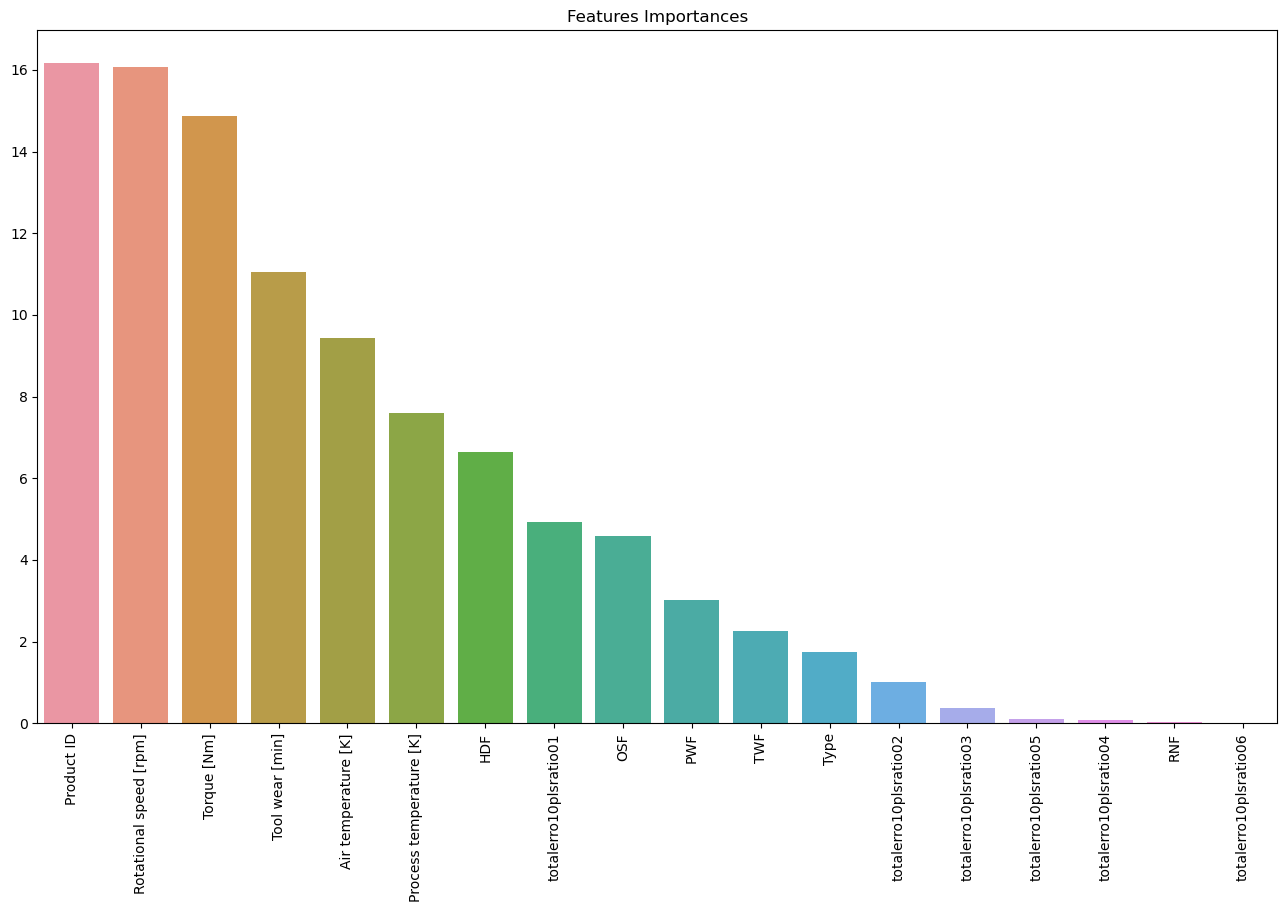

In [58]:
fig, axes = plt.subplots(1, figsize=(16, 9))

plt.title('Features Importances')
sns.barplot(y = CBfi.values, x = CBfi.index)
plt.xticks(rotation=90)

In [59]:
featuresordenadasparaCBFI = CBfi.index
lenfeatures = len(CBfi)
recall = []

recallCB = []
accuracyCB = []
precisionCB = []
f1CB = [] 

for n in range(1, lenfeatures):
    features = featuresordenadasparaCBFI[0:-n]
    NewX_train= X_train[features]##Xtrain com menos features, pegando só as mais importantes para o modelo
    feature_names = list(NewX_train.columns)
    model = CatBoostClassifier()
    
    train_pool = Pool(NewX_train.to_numpy(), y_train.to_numpy(), 
                      feature_names=feature_names, cat_features=['Product ID'])
    model.fit(train_pool, eval_set=train_pool, verbose=False )
    
    
    test_pool = Pool(X_test[features].to_numpy(), 
                 feature_names=feature_names, 
                 cat_features=['Product ID'])
    pred = model.predict_proba(test_pool)[:, 1]
    y_pred = np.round(pred)
    
    
       
    
    print(f'\n todas as features menos {n}')
    print(f' n = {n} recall = {recall_score(y_test, y_pred)}')###
    print(f' n = {n} accuracy_score = {accuracy_score(y_test, y_pred)}')###
    print(f' n = {n} precision_score = {precision_score(y_test, y_pred)}')###
    print(f' n = {n} f1_score = {f1_score(y_test, y_pred)} ')###
    recallCB.append(recall_score(y_test, y_pred))
    accuracyCB.append(accuracy_score(y_test, y_pred))
    precisionCB.append(precision_score(y_test, y_pred))
    f1CB.append(f1_score(y_test, y_pred))


 todas as features menos 1
 n = 1 recall = 0.7892215568862275
 n = 1 accuracy_score = 0.9958197094491122
 n = 1 precision_score = 0.962043795620438
 n = 1 f1_score = 0.8671052631578947 

 todas as features menos 2
 n = 2 recall = 0.7868263473053893
 n = 2 accuracy_score = 0.9958197094491122
 n = 2 precision_score = 0.9647577092511013
 n = 2 f1_score = 0.8667546174142481 

 todas as features menos 3
 n = 3 recall = 0.7868263473053893
 n = 3 accuracy_score = 0.9958404039567899
 n = 3 precision_score = 0.9661764705882353
 n = 3 f1_score = 0.8673267326732674 

 todas as features menos 4
 n = 4 recall = 0.7880239520958083
 n = 4 accuracy_score = 0.9957576259260792
 n = 4 precision_score = 0.9591836734693877
 n = 4 f1_score = 0.8652202498356345 

 todas as features menos 5
 n = 5 recall = 0.7856287425149701
 n = 5 accuracy_score = 0.9957990149414345
 n = 5 precision_score = 0.9647058823529412
 n = 5 f1_score = 0.8660066006600661 

 todas as features menos 6
 n = 6 recall = 0.784431137724550

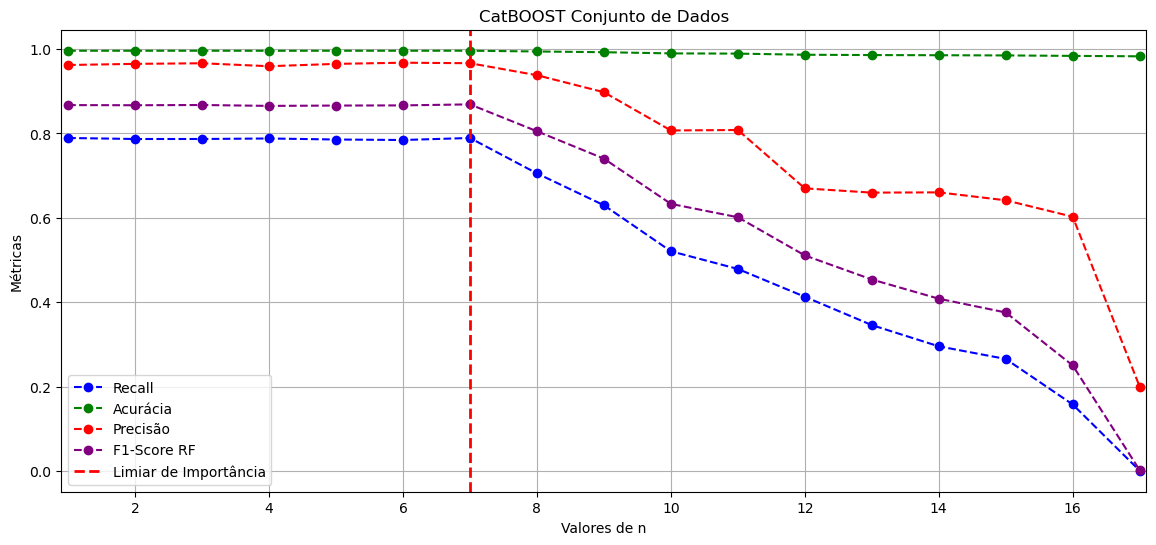

In [60]:
fig, axes = plt.subplots(1, figsize=(14, 6))
n = np.linspace(1, 17, 17)
# Primeiro subplot para o conjunto de dados RF
axes.plot(n, recallCB, label='Recall', marker='o', linestyle='--', color='b')
axes.plot(n, accuracyCB, label='Acurácia', marker='o', linestyle='--', color='g')
axes.plot(n, precisionCB, label='Precisão', marker='o', linestyle='--', color='r')
axes.plot(n, f1CB, label='F1-Score RF', marker='o', linestyle='--', color='purple')
axes.set_title('CatBOOST Conjunto de Dados')
axes.set_xlabel('Valores de n')
axes.set_ylabel('Métricas')
axes.axvline(x=7, color='r', linestyle='--', linewidth=2, label='Limiar de Importância')
plt.xlim([0.9 , 17.1])
axes.legend()
axes.grid(True)

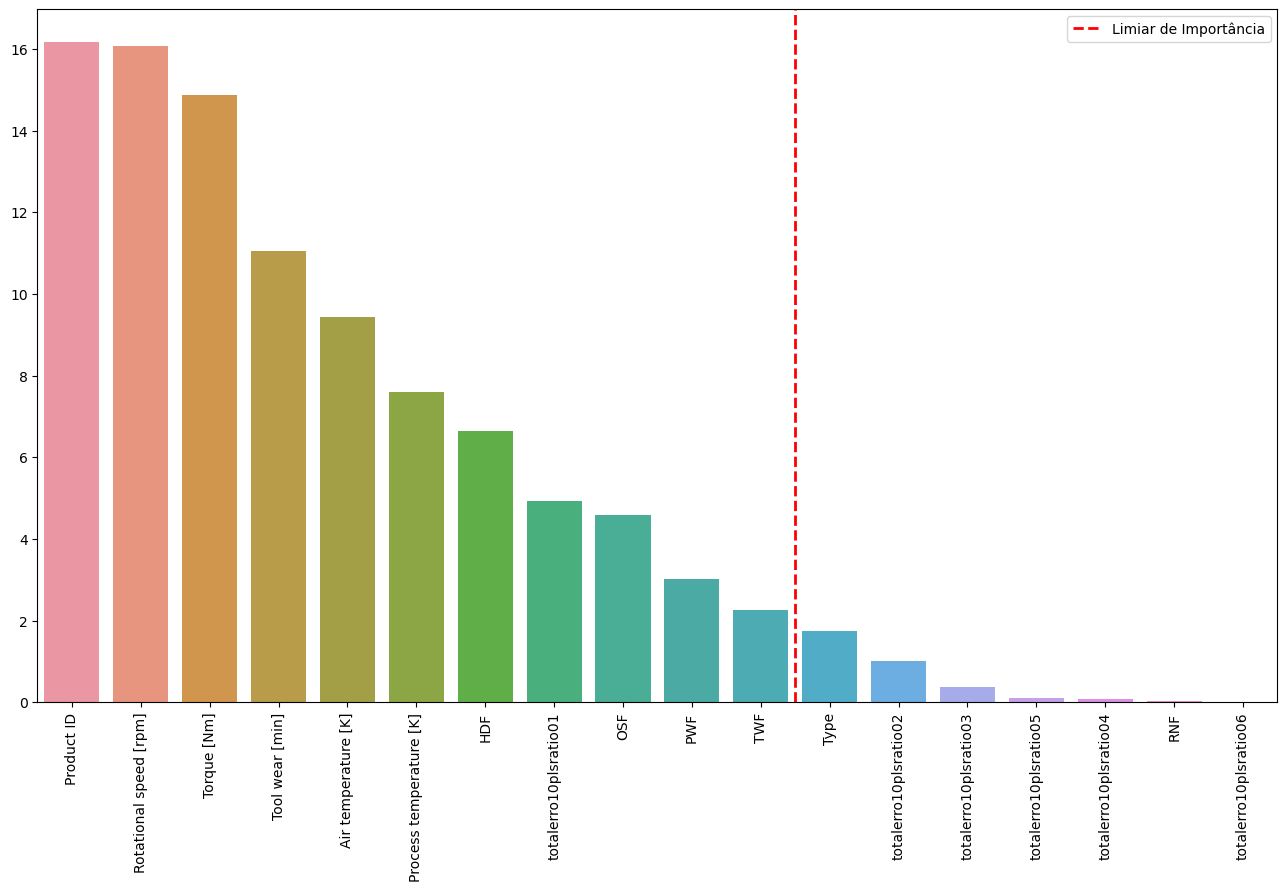

In [61]:
fig, axes = plt.subplots(1, figsize=(16, 9))


sns.barplot(y = CBfi.values, x = CBfi.index)
plt.xticks(rotation=90)


# Desenhando uma linha vertical em x 
axes.axvline(x=len(CBFI) - 7.5, color='r', linestyle='--', linewidth=2, label='Limiar de Importância')
axes.legend()
plt.show()

## Treino para submeter ao kaggle

In [62]:
X = df.drop(columns=['Machine failure'])
y = df['Machine failure']
feature_names = list(X.columns)

model = CatBoostClassifier()


train_pool = Pool(X.to_numpy(), y.to_numpy(), 
                  feature_names=feature_names, cat_features=['Product ID', 'Type'])


model = CatBoostClassifier() 

model.fit(train_pool, eval_set=train_pool, verbose=False)##verbose pra aparecer o texto

In [63]:
test_pool = Pool(test.to_numpy(), 
                 feature_names=feature_names, 
                 cat_features=['Product ID', 'Type'])
pred = model.predict_proba(test_pool)[:, 1]
pred

array([0.00029792, 0.00155158, 0.00040604, ..., 0.0005077 , 0.00417891,
       0.00098126])

In [64]:
test = pd.read_csv("playground-series-s3e17/test.csv")
test['Machine failure'] = pred
sample_submission = test[['Machine failure', 'id']]
sample_submission.set_index('id', inplace=True)
sample_submission.to_csv("catboostwithproductid.csv") ###
test.drop(columns='Machine failure', inplace = True)

In [65]:
####consegui precisão de 98# top ~ top 2% melhores algoritmos 